This tutorial illustrates some basic features of the `stochpy` package with simple 1D diffusion processes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stochpy.dynamics.diffusion1d import Wiener1D

# Monte-Carlo simulation of 1D diffusions

In [2]:
np.random.seed(seed=100)

Let us start by plotting sample paths of the Brownian motion with a one-liner:

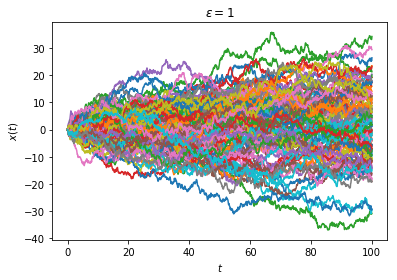

In [3]:
Wiener1D().trajectoryplot(*[Wiener1D().trajectory(0.,0.,T=100) for n in range(100)], title=r'$\epsilon=1$');

Or, in a different style:

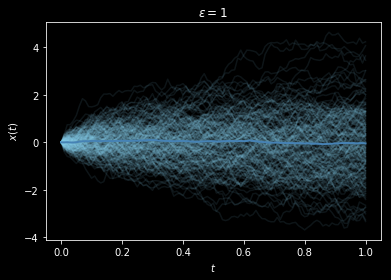

In [4]:
from stochpy.io.plot import trajectory_plot1d
def ensemble_plot1d(*args, **kwargs):
    fig, ax = trajectory_plot1d(*((t, x, {'color': 'skyblue', 'alpha': 0.1}) for t, x in args), **kwargs)
    ax.plot(*np.array(args).mean(axis=0), color='steelblue', lw=2)
    return fig, ax
with plt.style.context(('dark_background')):
    ensemble_plot1d(*[Wiener1D().trajectory(0., 0., T=1, dt=0.01) for n in range(200)], title=r'$\epsilon=1$');

Let us check that the mean square displacement increases linearly with time:

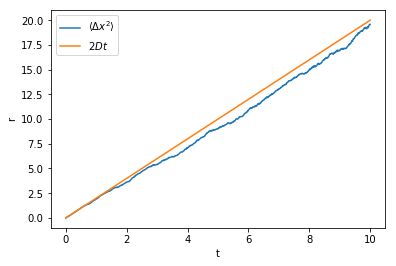

In [5]:
ensemble = np.array([Wiener1D().trajectory(0., 0., T=10, dt=0.01) for n in range(1000)])
time = np.average(ensemble[:, 0, :], axis=0)
ax = plt.axes(xlabel='t', ylabel='r')
ax.plot(time, np.average(ensemble[:, 1, :]**2, axis=0), label=r'$\langle \Delta x^2 \rangle$')
ax.plot(time, 2*time, label=r'$2Dt$')
ax.legend()
plt.show()

# Numerical solution of the Fokker-Planck equation

## Testing timestep

The time step *dt* should be much smaller than *dx^2/D*, with *dx* the spatial resolution and *D* the diffusivity

### Testing *dt* at fixed *dx=0.1* and varying *D*

In [6]:
from stochpy.io.plot import pdf_plot1d
from stochpy.fokkerplanck import FokkerPlanck1D
import numpy as np

/Users/corentin/Library/Python/3.7/lib/python/site-packages/stochpy-0.0.1-py3.7.egg/stochpy/fokkerplanck.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/corentin/Library/Python/3.7/lib/python/site-packages/stochpy-0.0.1-py3.7.egg/stochpy/fokkerplanck.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/corentin/Library/Python/3.7/lib/python/site-packages/stochpy-0.0.1-py3.7.egg/stochpy/fokkerplanck.py:153: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


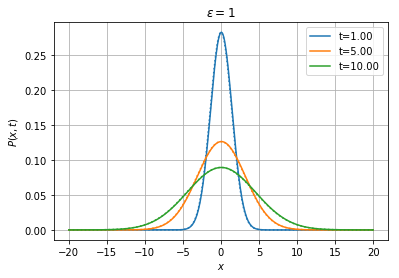

In [7]:
Wiener1D().pdfplot(1, 5, 10, dt=0.001, npts=400, bounds=(-20.0, 20.0), 
                   t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), th=True);

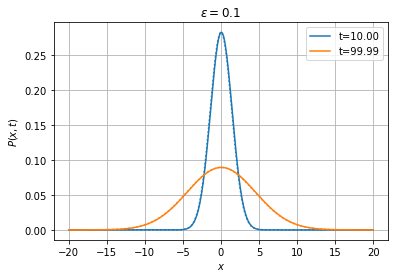

In [8]:
Wiener1D(D=0.1).pdfplot(10, 100, dt=0.01, npts=400, bounds=(-20.0, 20.0), 
                        t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), th=True);

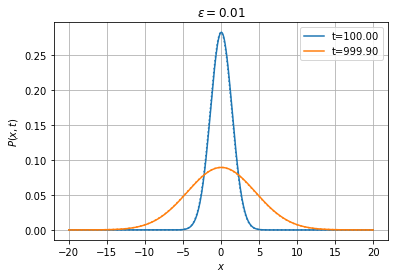

In [9]:
Wiener1D(D=0.01).pdfplot(100, 1000, dt=0.1, npts=400, bounds=(-20.0, 20.0), 
                         t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), th=True);

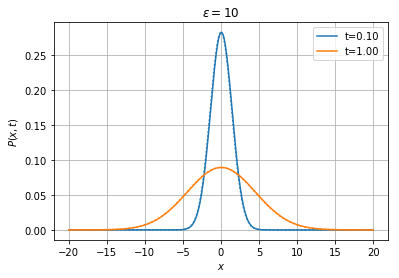

In [10]:
Wiener1D(D=10).pdfplot(0.1, 1, dt=0.0001, npts=400, bounds=(-20.0, 20.0), 
                       t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), th=True);

### Testing *dt* at fixed *D=1* and varying *dx*

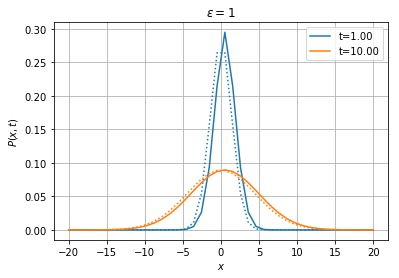

In [11]:
Wiener1D(D=1).pdfplot(1, 10, dt=0.1, npts=40, bounds=(-20.0, 20.0), 
                      t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), th=True);

## Testing Boundary Conditions

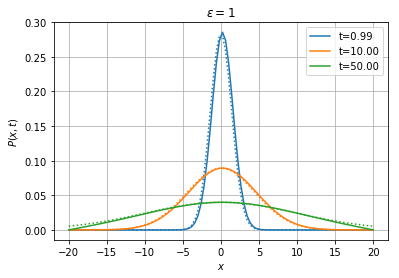

In [12]:
Wiener1D(D=1).pdfplot(1, 10, 50, dt=0.01, npts=100, bounds=(-20.0, 20.0), 
                      t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), th=True);

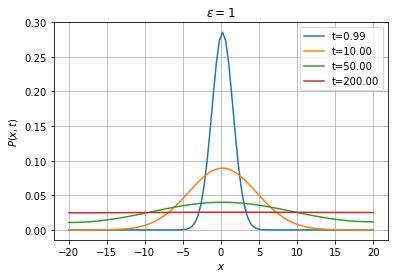

In [13]:
Wiener1D(D=1).pdfplot(1, 10, 50, 200, dt=0.01, npts=100, bounds=(-20.0, 20.0), 
                      t0=0.0, P0='dirac', bc=('reflecting', 'reflecting'));

## Testing the numerical schemes

With the *implicit* and *Crank-Nicolson* schemes, we can afford using much larger timesteps than with the explicit method.

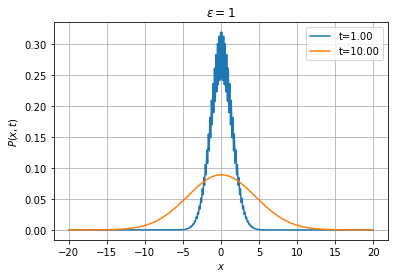

In [14]:
Wiener1D(D=1).pdfplot(1, 10, dt=0.005, npts=400, bounds=(-20.0, 20.0), 
                      t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), method='explicit');

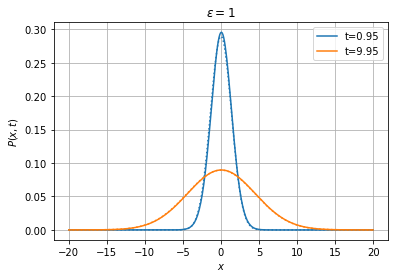

In [15]:
Wiener1D(D=1).pdfplot(1, 10, dt=0.05, npts=400, bounds=(-20.0, 20.0), 
                      t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), method='implicit', th=True);

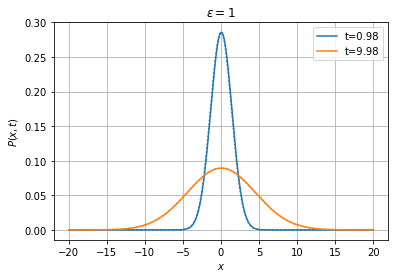

In [16]:
Wiener1D(D=1).pdfplot(1, 10, dt=0.025, npts=400, bounds=(-20.0, 20.0), 
                      t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), method='cn', th=True);